In [1]:
# use pandas numpy as usual
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from split_data_n_ways import split_data_n_ways, fast_classify_features
from sklearn.preprocessing import LabelEncoder
LLB = LabelEncoder()
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.43
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [2]:
datapath = '../Ram/Data_Sets/'
filename = 'titanic_train.csv'
sep = ','
train_datafile = datapath+filename
#target = ['target_1','target_2','target_3']
target = 'Survived'

In [3]:
# load dataset
train = pd.read_csv(train_datafile, header=0, sep=sep)
print(train.shape)
train.head(1)

(838, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# split into input and output elements
#train, test = split_data_n_ways(train, target, n_splits=2)
stri, numi = fast_classify_features(train)

Distribution of string columns in datatset:
    number of binary = 1, cats = 1, high cats = 0, very high cats = 3
Distribution of integer columns in datatset:
    number of binary = 1, cats = 3, high cats = 0, very high cats = 1
Distribution of floats: floats = 2
Data Transformation Advisory:
    perform categorical feature crosses
    perform integer feature crosses
    transform ['PassengerId'] from integer to float


In [5]:
### These are good candidates for turning into float ##
numi['veryhighcats']

['PassengerId']

In [6]:
filename = 'titanic_test.csv'
url = datapath + filename
test = pd.read_csv(url, header=0, sep=sep)
#train, test = split_data_n_ways(train, target, n_splits=2)
print(train.shape, test.shape)
test.head(1)

(838, 12) (53, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [7]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "taxi"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
    Modified column names to fit no-spaces-in-column-names Rule in Tensorflow!
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = (838,

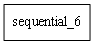

Model plot saved in file: deep_autoviml_taxi_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.3012422360248448}
After preprocessing using keras layers, features dimensions is now 48
    original datasize = 839, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 900
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_auto

2005
    Stopped epoch = 9


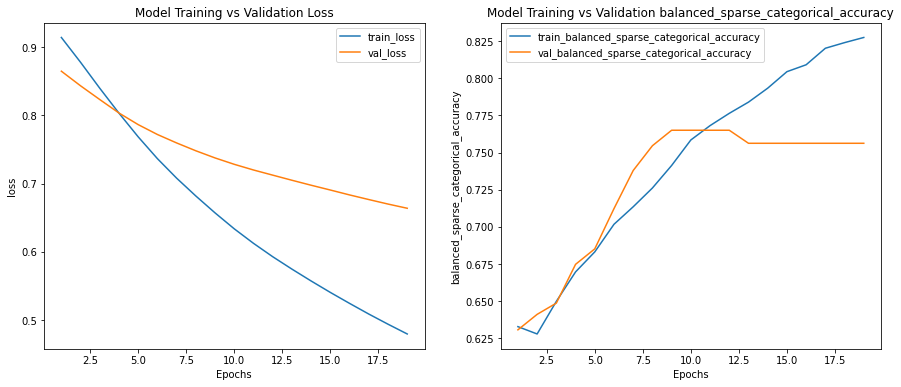

Time taken to train model (in mins) = 2
    Stopped epoch = 9
Held out data actuals shape: (96,)
    samples from labels: [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

Held out predictions shape:(96,)
    Sample predictions: [0 1 0 1 0 0 0 0 1 1]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Survived
#################################################################


    Accuracy          = 77.1%
    Balanced Accuracy = 75.8%
    Precision         = 73.0%
    Average Precision = 76.3%
    Recall            = 69.2%
    F1 Score          = 71.1%
    ROC AUC           = 39.0%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 1.5997297e-05
    set learning rate using best model: 1.5997297e-05
    max epochs for training = 9

Model not being saved since save_model_flag set to False...
7038

Saving vocab dictionary using pickle in taxi\auto\model_2021_06_21-18_42_49\artifacts\cat_vocab_dict.pickle...will take time...
    Saved pickle file in taxi\auto\model_2021_06_21-18_42_49\artifacts\cat_vocab_dict.pickle

Saving variable definitions file using pickle in taxi\auto\model_2021_06_21-18_42_49\artifacts\var_df.pickle...will take time...
    Saved pickle file in taxi\auto\model_2021_06_21-18_42_49\artifacts\var_df.pickle

Deep_Auto_ViML completed. Total time taken

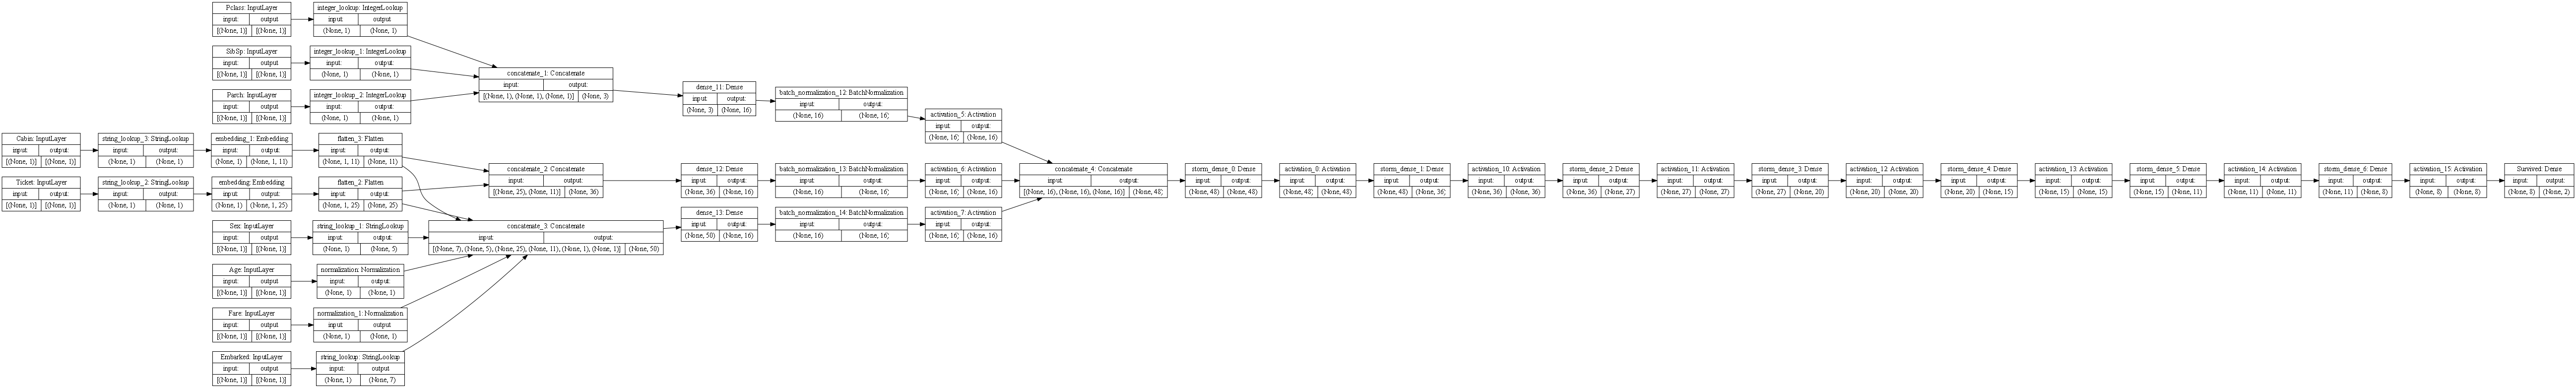

Model plot saved in file: deep_autoviml_taxi_auto_model_after.png


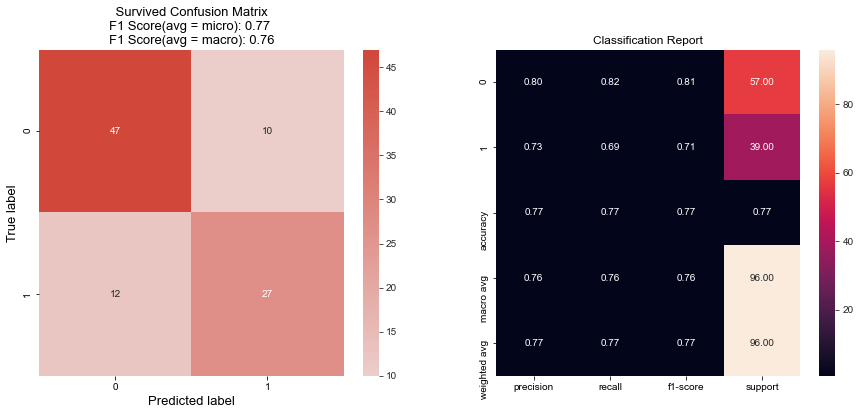

In [8]:
 model, cat_vocab_dict = deepauto.fit(train_datafile, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=1)

In [9]:
from deep_autoviml.utilities.utilities import plot_classification_results, print_regression_model_stats
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
#from autoviml.Auto_ViML import plot_regression_scatters

In [10]:
predictions = deepauto.predict(model, project_name, test_dataset=url,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x000001CC81F80C10> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 53
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
There are 50 missing values in dataset - filling with default values...
    test data loaded successfully.
test data size =  53 , batch_size =  48
    number of steps needed to predict: 2
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


In [11]:
y_preds = predictions[1]
y_preds[:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [12]:
y_test = test[target].values
y_test[:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
print('Balanced Accuracy = %0.1f%%' %(100*balanced_accuracy_score(y_test, y_preds)))
print(classification_report(y_test, y_preds))

Balanced Accuracy = 83.4%
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.74      0.85      0.79        20

    accuracy                           0.83        53
   macro avg       0.82      0.83      0.82        53
weighted avg       0.84      0.83      0.83        53



In [14]:
#print_regression_model_stats(y_test, y_preds)

### It takes about 24 mins for 130K rows and 181 columns = 130000*181/24 = takes about 1 min for 1m dimension

# 

In [15]:
pd.Series([0.1, 0.9, 1.2, 3.4, 9.0, 0.01, 0.4, 1.0, 0.8, 0.5]).mean()

1.7309999999999999

# 